In [1]:
from diffusers import StableDiffusionPipeline

pipe = StableDiffusionPipeline.from_pretrained("CompVis/stable-diffusion-v1-4")

/home/skolak/animAIte/venv/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Fetching 16 files: 100%|██████████| 16/16 [00:00<00:00, 23546.97it/s]


In [133]:
pipe = pipe.to("cuda:3")
prompt = "cartoon of a wacky polish cow with a hat on"
images = pipe(prompt, num_inference_steps=50, width=1024, height=576) #possibly the limit

100%|██████████| 50/50 [00:59<00:00,  1.19s/it]


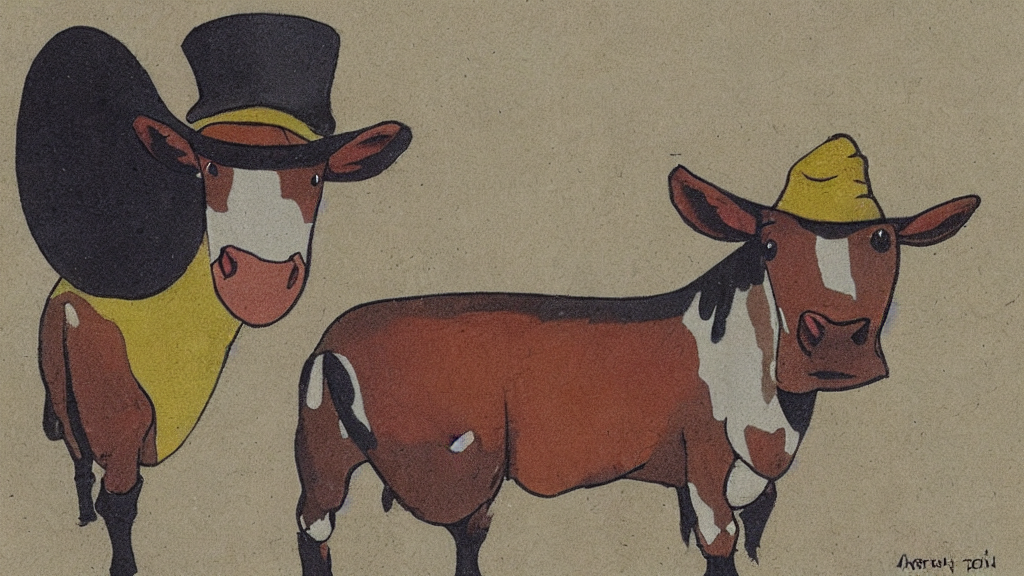

In [134]:
import os 
import random 

base_path = "../images"
if not os.path.exists(base_path):
    os.makedirs(base_path)

prompt_path = prompt.replace(' ', '_')
full_path = os.path.join(base_path, prompt_path)
if os.path.exists(full_path):
    #find a random number to append to the end of the path
    random_num = random.randint(0, 100000)
    full_path = full_path + str(random_num)
    os.makedirs(full_path)
else:
    os.makedirs(full_path)

for i, img in enumerate(images):
    img[0].save(os.path.join(full_path, f"image_{i}.png"))

#print the last image
images[-1][0]

In [135]:
#add all images in the folder to a gif 

import imageio
import os

images = []
for file_name in os.listdir(full_path):
    #sort them in numerical order 
    if file_name.endswith('.png'):
        num = int(file_name.split('_')[1].split('.')[0])
        images.append((num, file_name))
images.sort(key=lambda x: x[0])
print(images)

images_new = []
for num, file_name in images:
    file_path = os.path.join(full_path, file_name)
    images_new.append(imageio.imread(file_path))

filename = prompt.replace(' ', '_') + '.gif'
if os.path.exists(os.path.join(full_path, filename)):
    filename = filename.replace('.gif', '') + str(random.randint(0, 100000)) + '.gif'
imageio.mimsave(os.path.join(full_path, filename), images_new, duration = .25)


[(0, 'image_0.png'), (1, 'image_1.png'), (2, 'image_2.png'), (3, 'image_3.png'), (4, 'image_4.png'), (5, 'image_5.png'), (6, 'image_6.png'), (7, 'image_7.png'), (8, 'image_8.png'), (9, 'image_9.png'), (10, 'image_10.png'), (11, 'image_11.png'), (12, 'image_12.png'), (13, 'image_13.png'), (14, 'image_14.png'), (15, 'image_15.png'), (16, 'image_16.png'), (17, 'image_17.png'), (18, 'image_18.png'), (19, 'image_19.png'), (20, 'image_20.png'), (21, 'image_21.png'), (22, 'image_22.png'), (23, 'image_23.png'), (24, 'image_24.png'), (25, 'image_25.png'), (26, 'image_26.png'), (27, 'image_27.png'), (28, 'image_28.png'), (29, 'image_29.png'), (30, 'image_30.png'), (31, 'image_31.png'), (32, 'image_32.png'), (33, 'image_33.png'), (34, 'image_34.png'), (35, 'image_35.png'), (36, 'image_36.png'), (37, 'image_37.png'), (38, 'image_38.png'), (39, 'image_39.png'), (40, 'image_40.png'), (41, 'image_41.png'), (42, 'image_42.png'), (43, 'image_43.png'), (44, 'image_44.png'), (45, 'image_45.png'), (46, 'i

/tmp/ipykernel_945945/1862554196.py:18: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images_new.append(imageio.imread(file_path))


In [136]:
#display the gif 
from IPython.display import Image
Image(url=os.path.join(full_path, filename))